# Projekt 1

## Generowanie labiryntu przy pomocy algorytmu genetycznego

Aby wygenerować labirynt używam algorytmu genetycznego i algorytmu pso, zera oznaczają miejsca niedostępne natomiast jedynki to miejsca po których dozwolone jest poruszanie się.

Pola czarne to ściany, pola ciemno-szare to miejsca po których możemy się poruszać, pole jasno-szare oznacza start natomiast pole białe to koniec labiryntu. Implementacja pól w kodzie to kolejno 0, 1, 2, 3. Natomiast graficznie wymnożyłem te liczby przez 70 dzięki czemu na wygenerowanym obrazku jesteśmy w stanie łatwo rozróżnić te pola.

Poniżej znajdują się dwa wygenerowane labirynty, pierwszy z nich powstał z użyciem pygad natomiast za drugi odpowiada pyswarms.

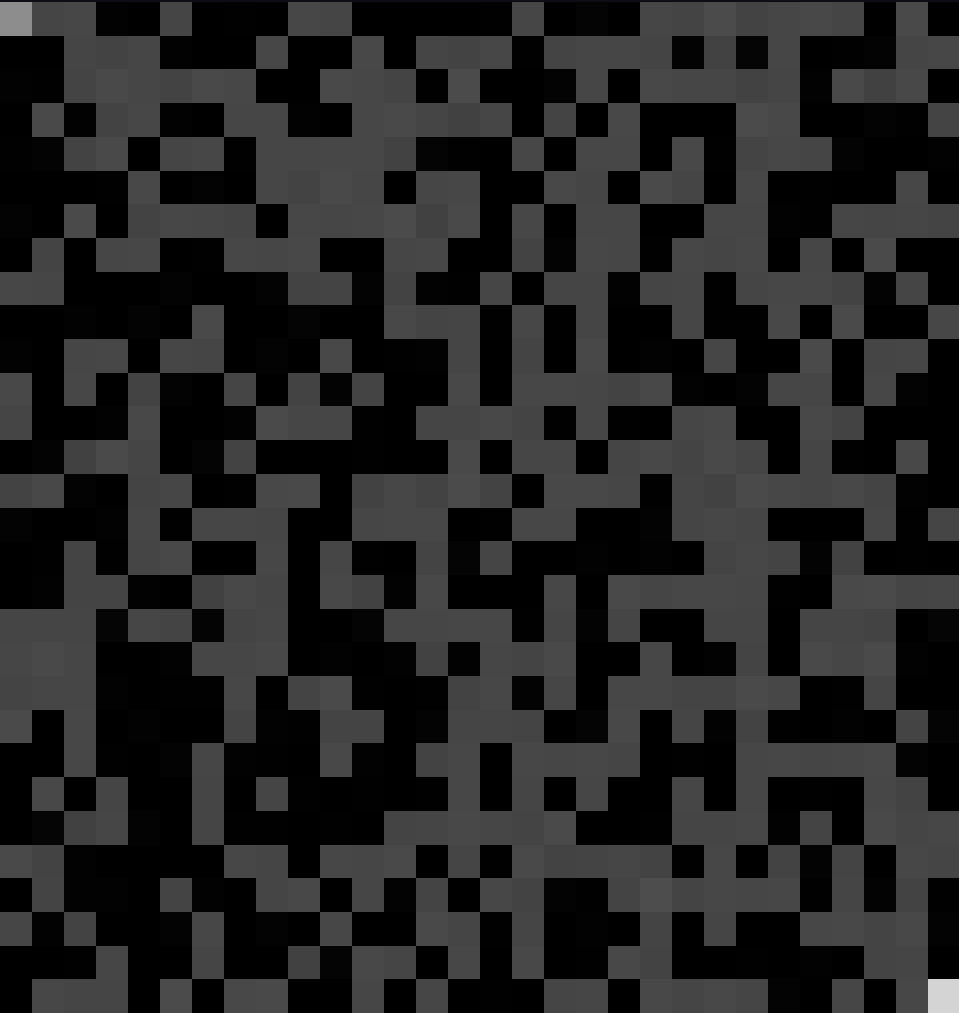

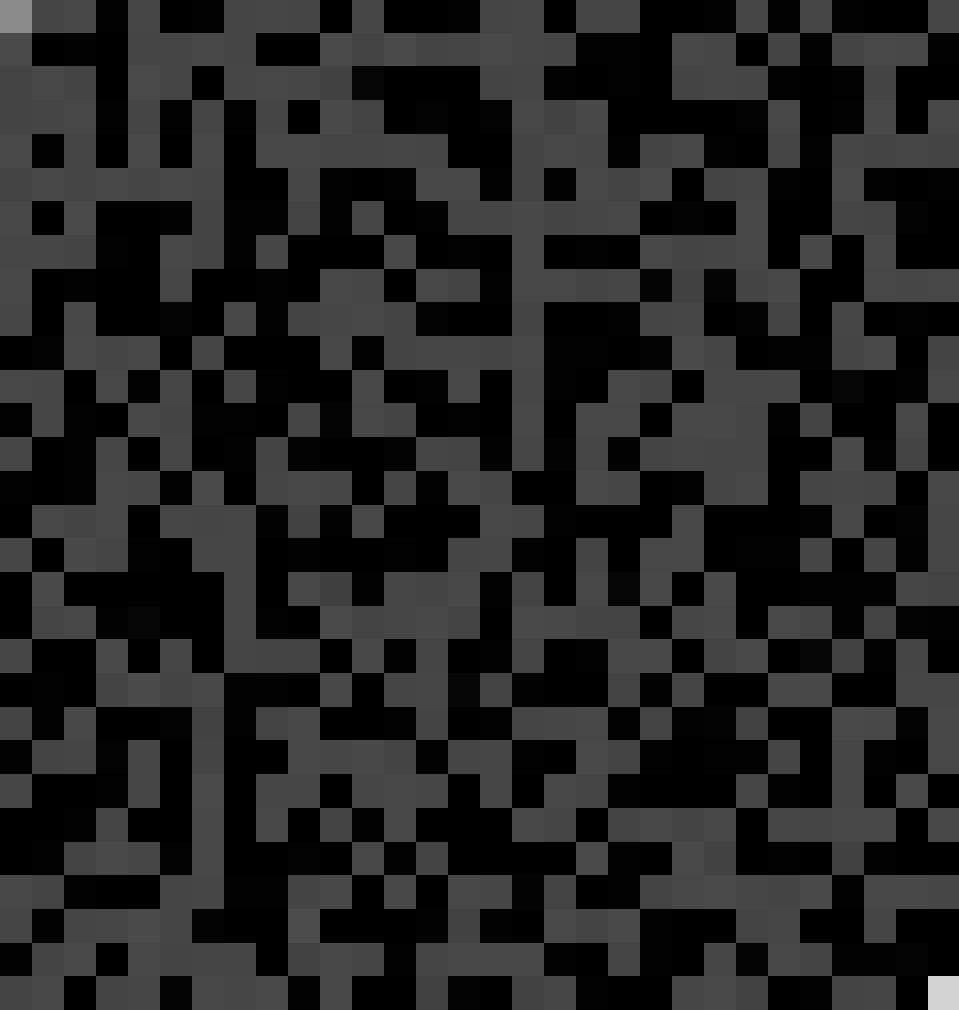

### Pierwsza część funkcji fitness

Pierwszą jak i najważniejszą stanową mojej funkcji fitness jest warunek czy labirynt jest rozwiązywalny.
Start labiryntu umieszczam w jego górnym lewym rogu natomiast koniec znajduje się w prawym dolnym rogu. 
Funkcja solveMaze rozwiązuje labirynt, dodatkowo zabrania cofać się na wcześniej odwiedzone miejsce. Jeśli labirynt zostanie rozwiązany nagradzam algorytm wartością rozmiaru podniesionego do kwadratu, w momencie gdy labirynt nie jest rozwiązywalny zwrócona zostaje odległość pomiędzy punktem w którym owy algorytm się zakończył a metą.

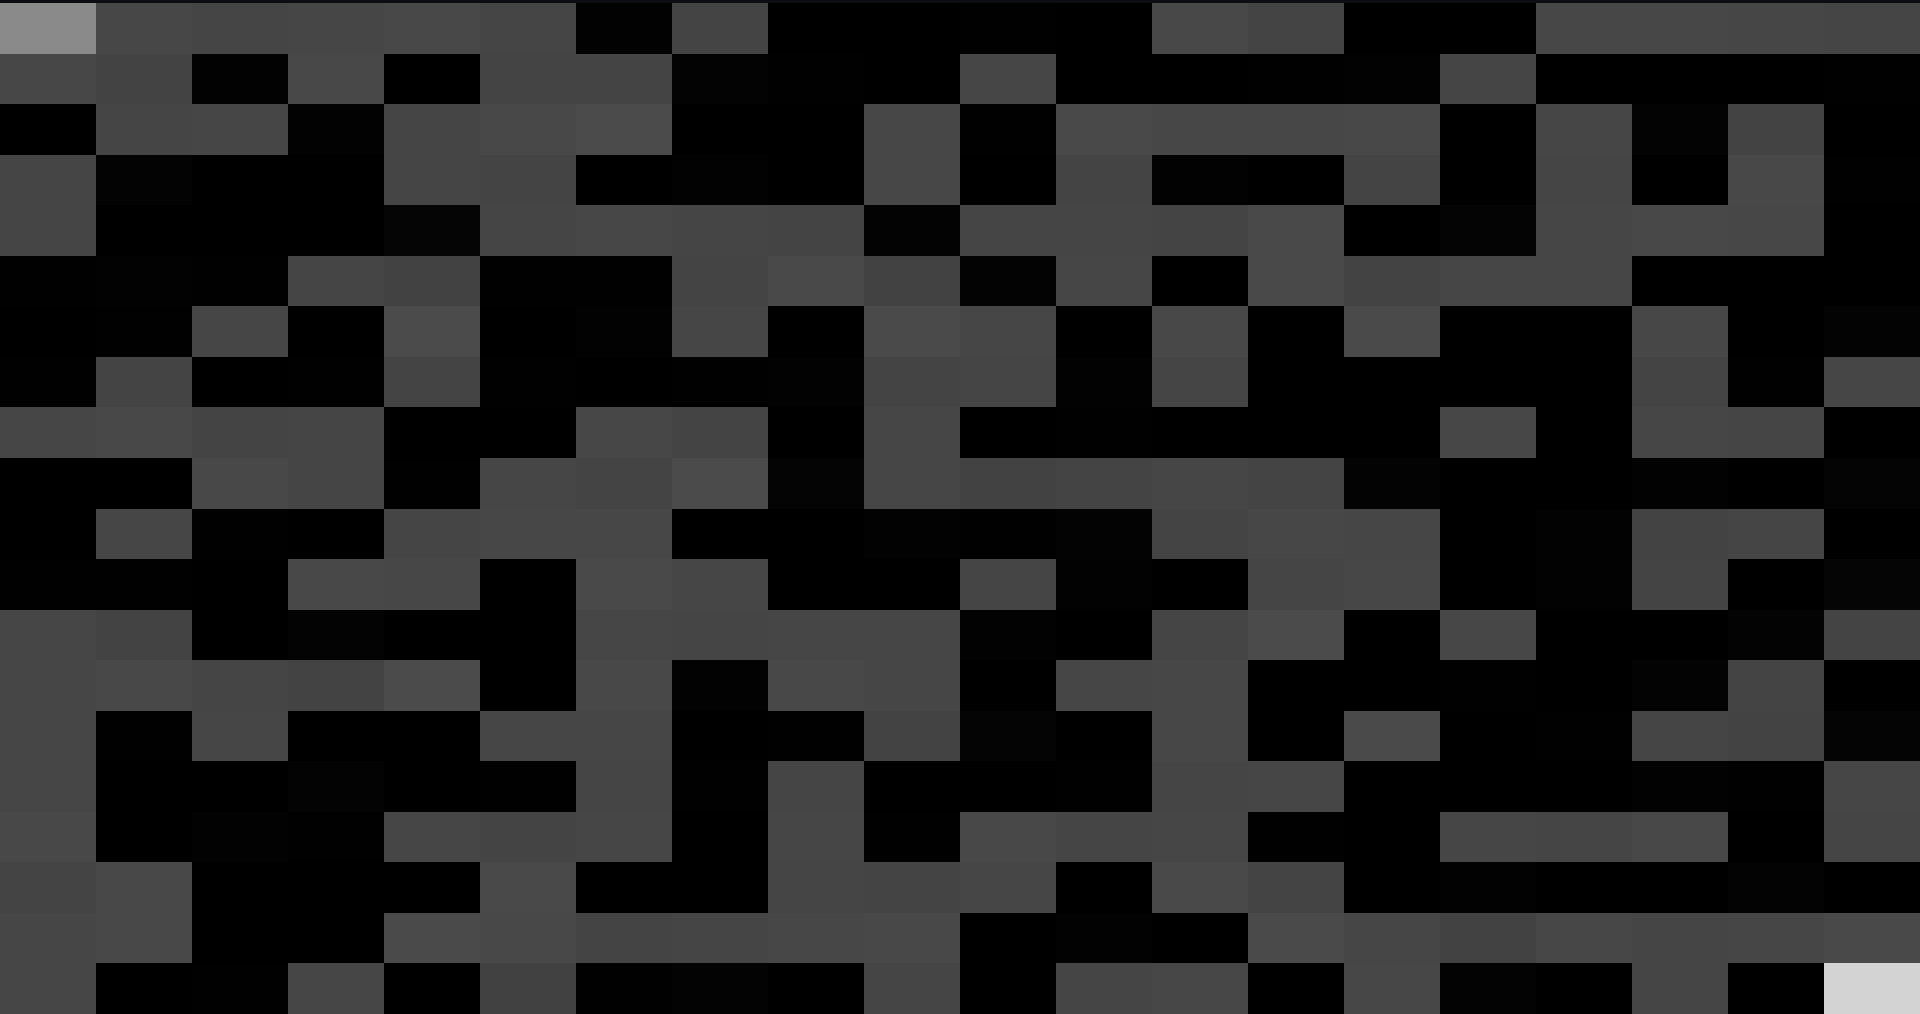

Jak widzimy powyżej został utworzony labirynt który da się rozwiązać 

### Druga część funkcji fitness

Drugim ważnym elementem funkcji fitness jest ilość zer i jedynek znajdujących się w labiryncie. dbam o to aby ilość tych liczb była do siebie zbliżona. W najlepszym wypadku różnica pomiędzy ilością 0 i 1 będzie wynosiła zero. W innych sytuacjach różnica zostaje wymnożona przez rozmiar labiryntu aby dla większych rozmiarów, algorytm nie wypełniał całego labiryntu jedynkami. Wynik tej różnicy jest ujemny aby ukarać algorytm za brak równowagi.

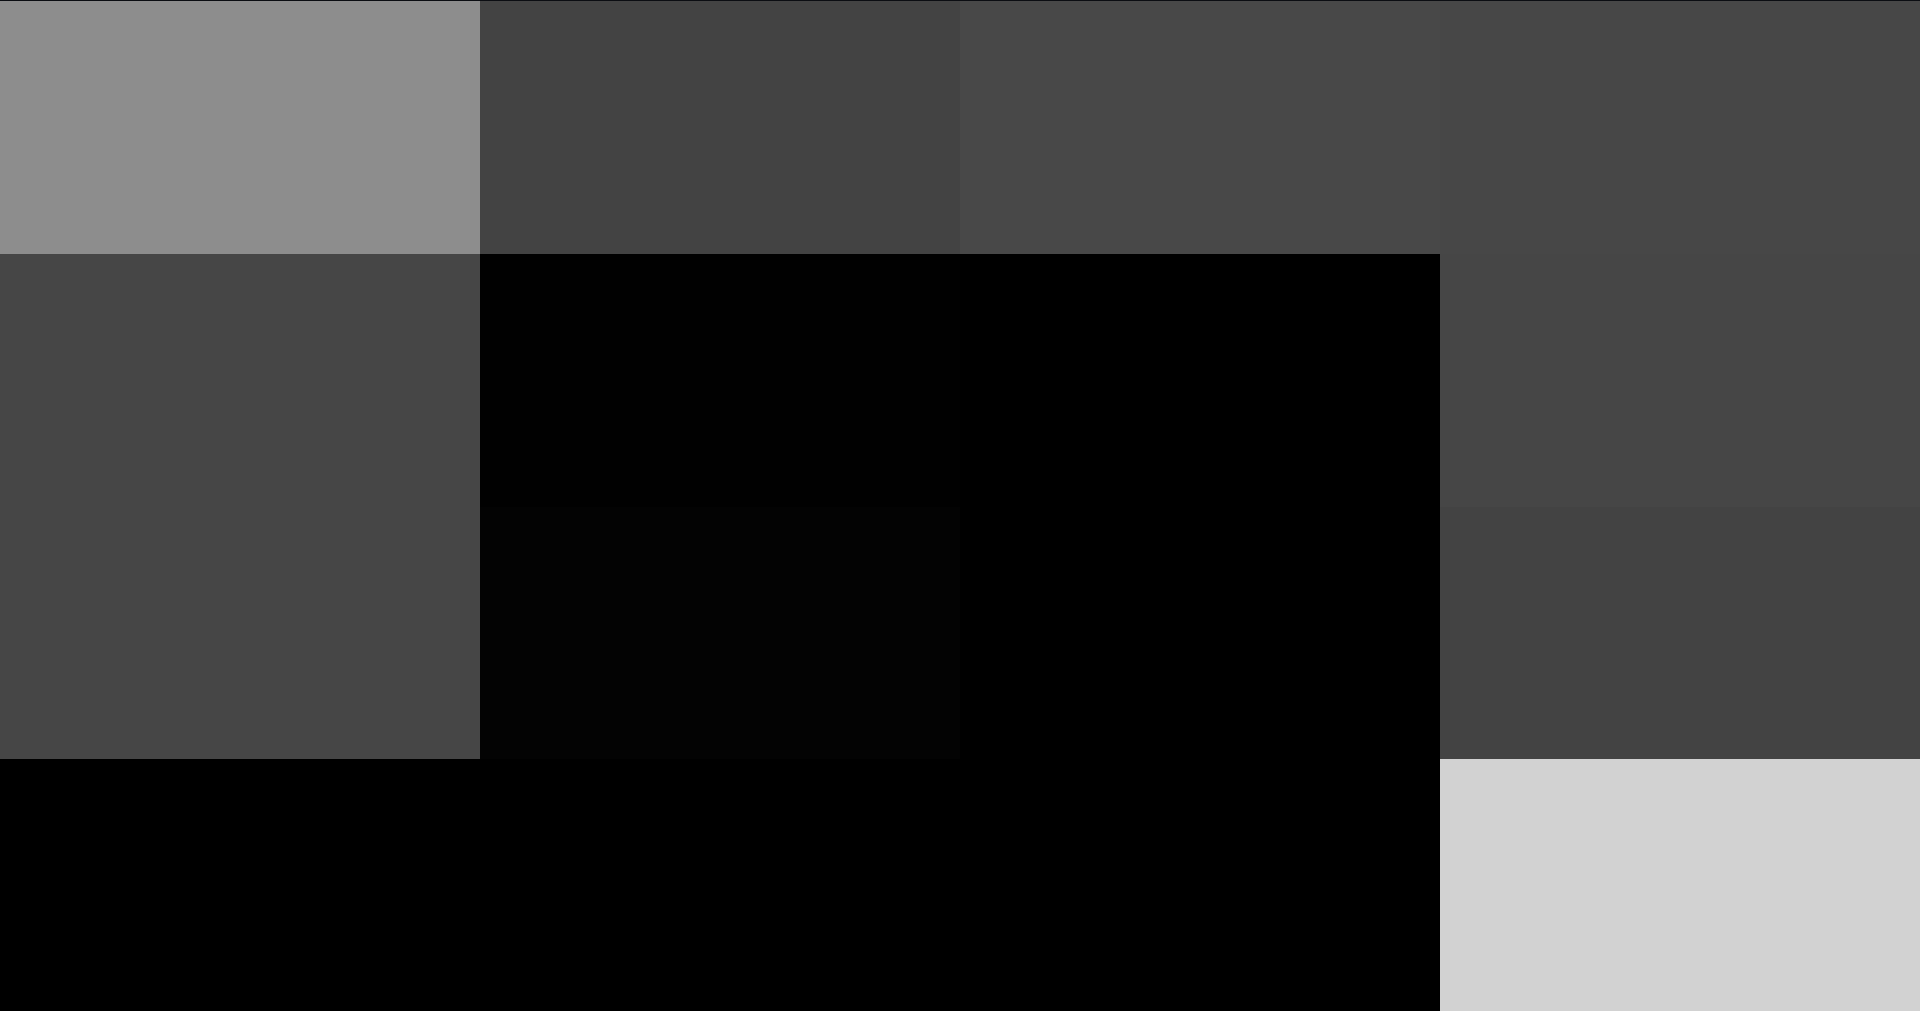

Na powyższym obrazku widzimy że labirynt posiada 7 zer i 7 jedynek, jak i istnieje możliwość rozwiązania tego labiryntu.

```python
def countZerosAndOnes(maze):
    zerosAndOnes = collections.Counter(maze)
    result = -(size**2) * abs(zerosAndOnes[0] - zerosAndOnes[1])
    return result
```

Poprzez mnożenie różnicy przez rozmiar do kwadratu mamy pewność że nasz algorytm skupi się na wyrównaniu zer i jedynek zaraz po upewnieniu się że labirynt jest rozwiązywalny.

### Trzecia część funkcji fitness

Trzecią częścią funkcji fitness jest sprawdzenie ile miejsc w labiryncie algorytm próbował odwiedzic. Używam tego aby labirynt posiadał jak największą ilość miejsc które jesteśmy w stanie odwiedzić. Im większa ilośc miejsc które algorytm próbował odwiedzić tym bardziej zostaje on nagrodzony.

Poniżej znajdują się dwa labirynty wygenerowane bez sprawdzenia jaką ilość miejsc probował odwiedzić algorytm rozwiązujący labirynt, czyli istnieje możliwość pojawienia się wielu ścieżek do których nie będzie dostępu i głownej ścieżki wiodącej która pozwala na dotarcie do mety.
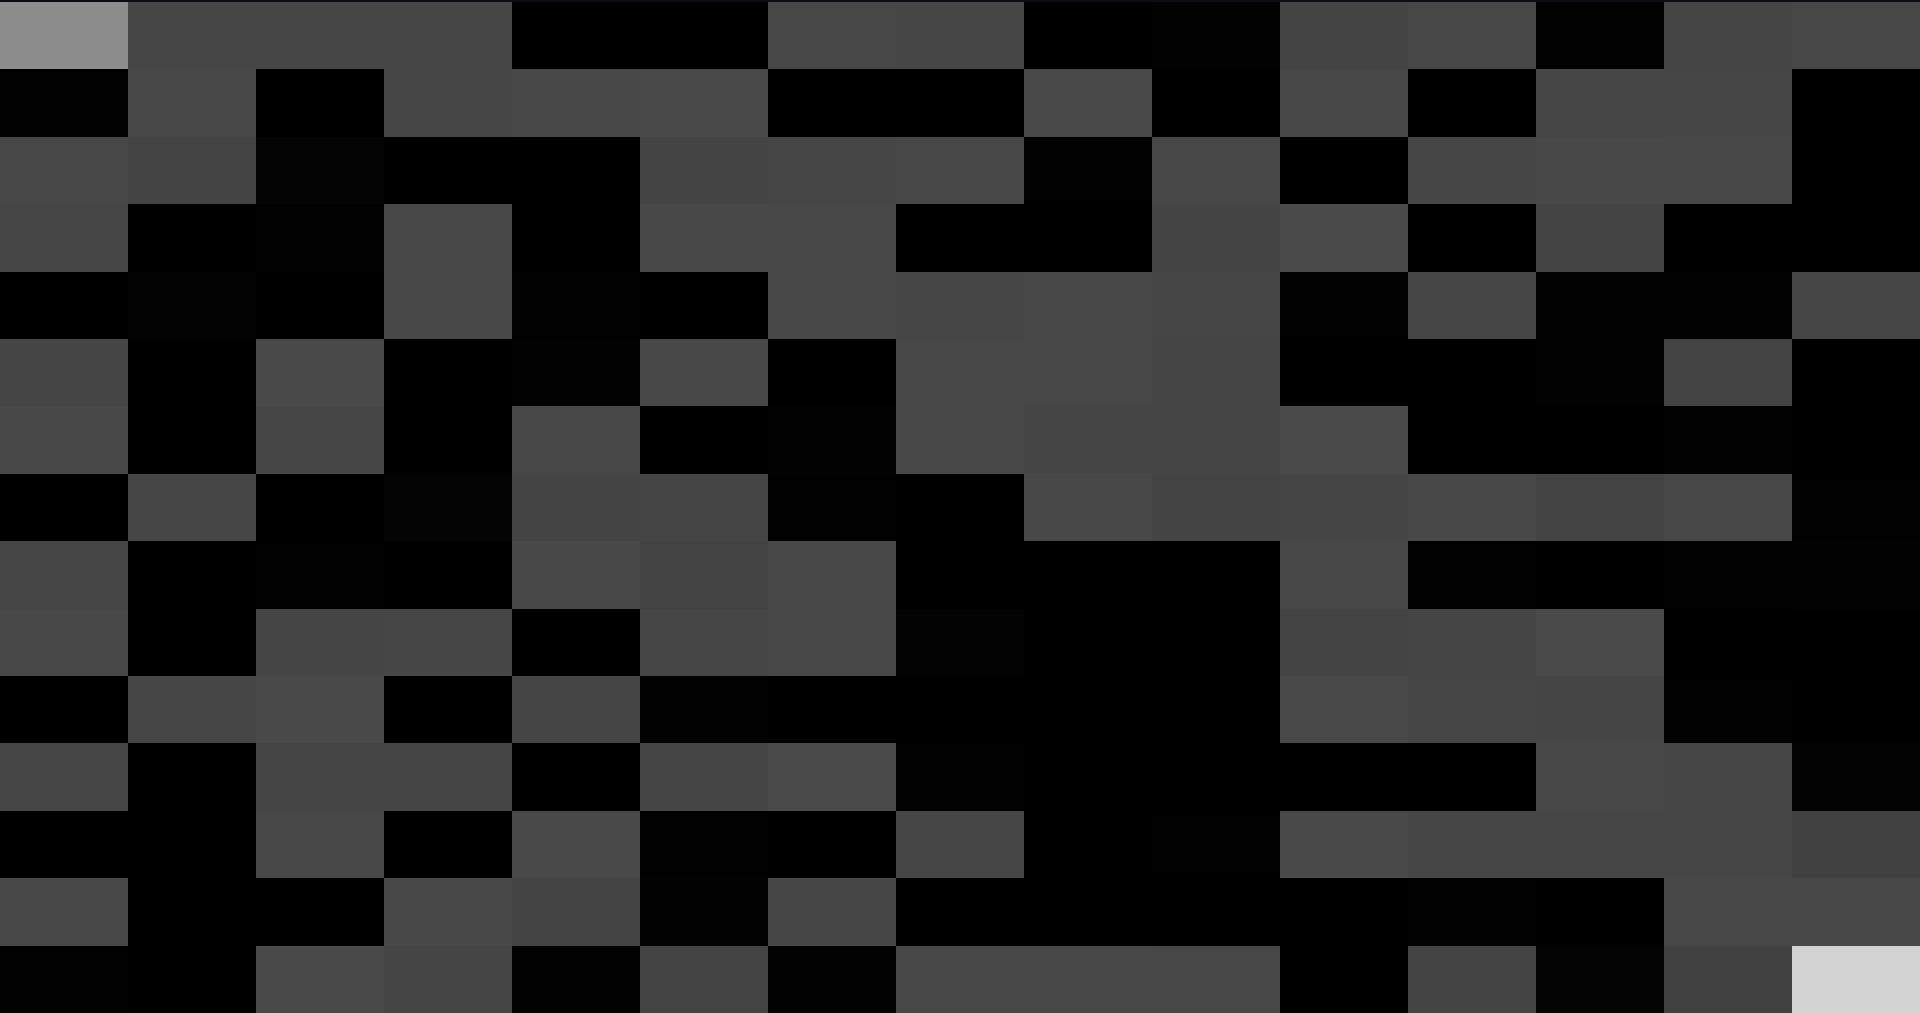

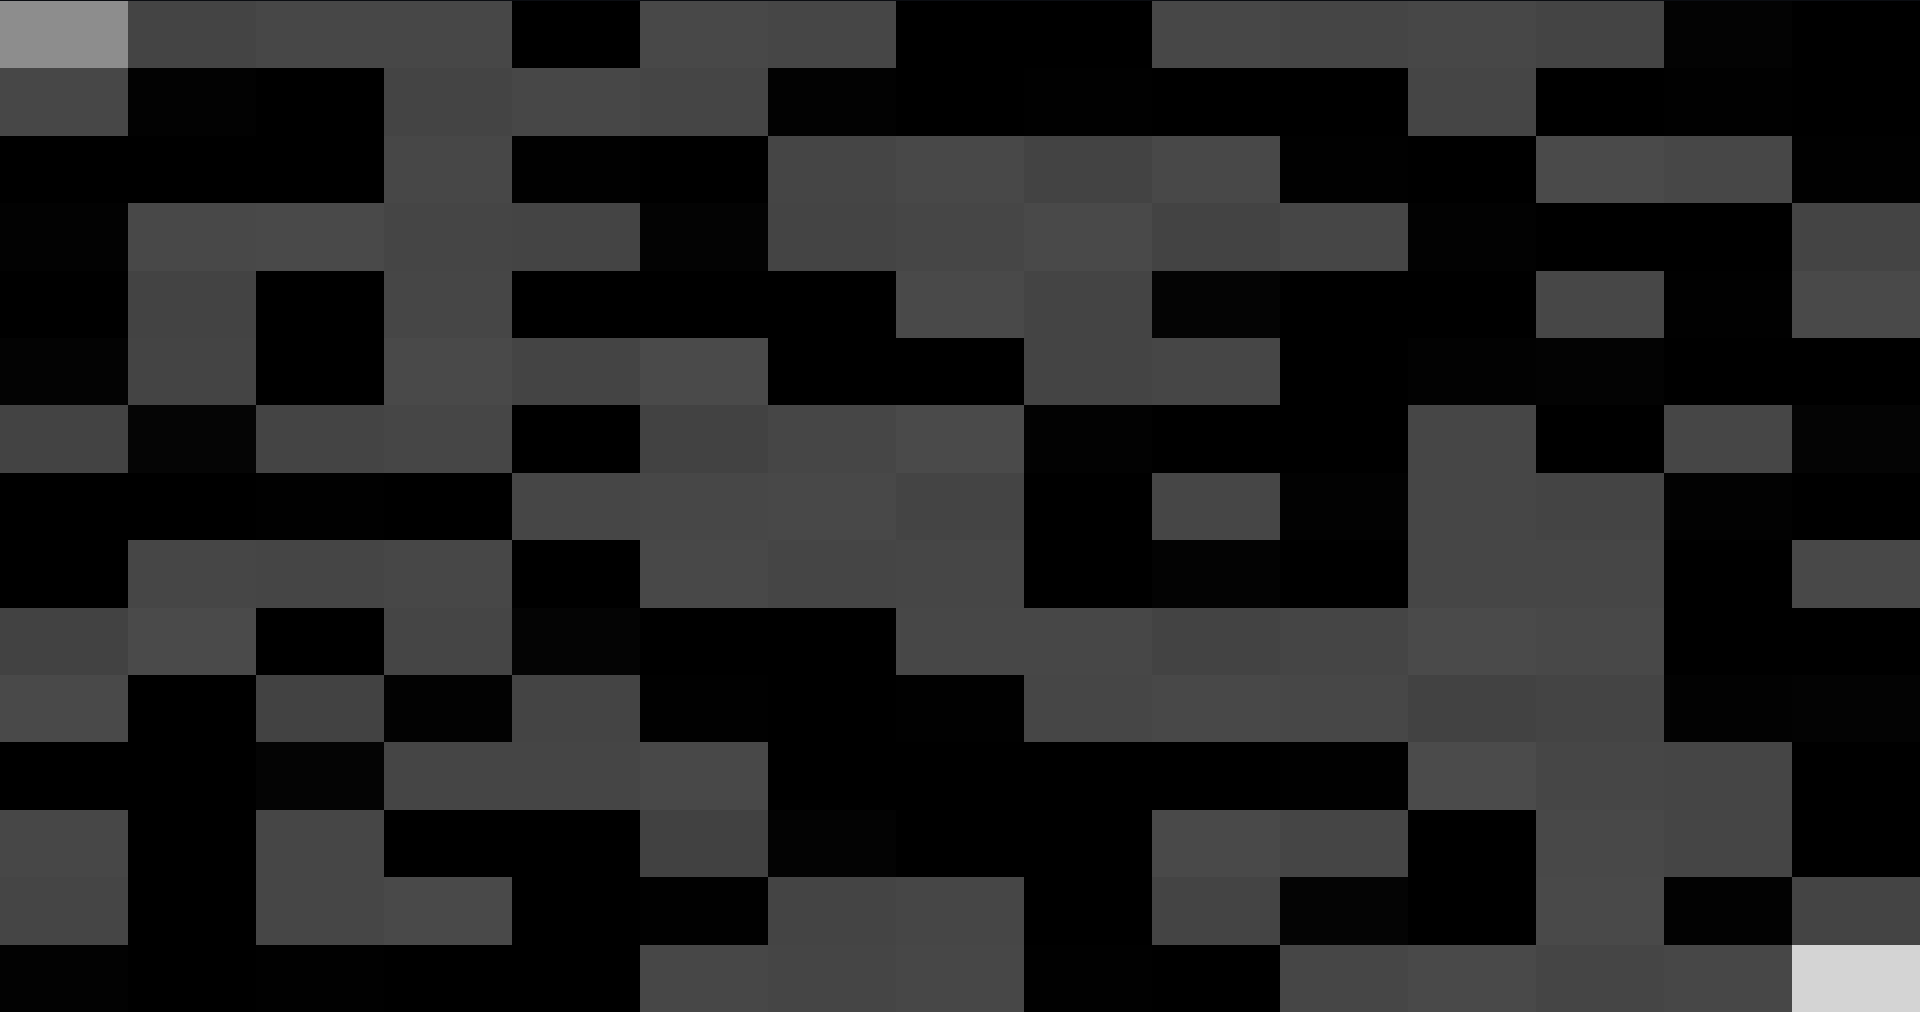

Teraz zobaczmy różnicę kiedy pod uwagę weźmiemy warunek trzeciej funkcji fitness.
Chcemy aby nasz algorytm stworzył labirynt w którym szukając rozwiązania zostanie
odwiedzone jak najwięcej współrzędnych.
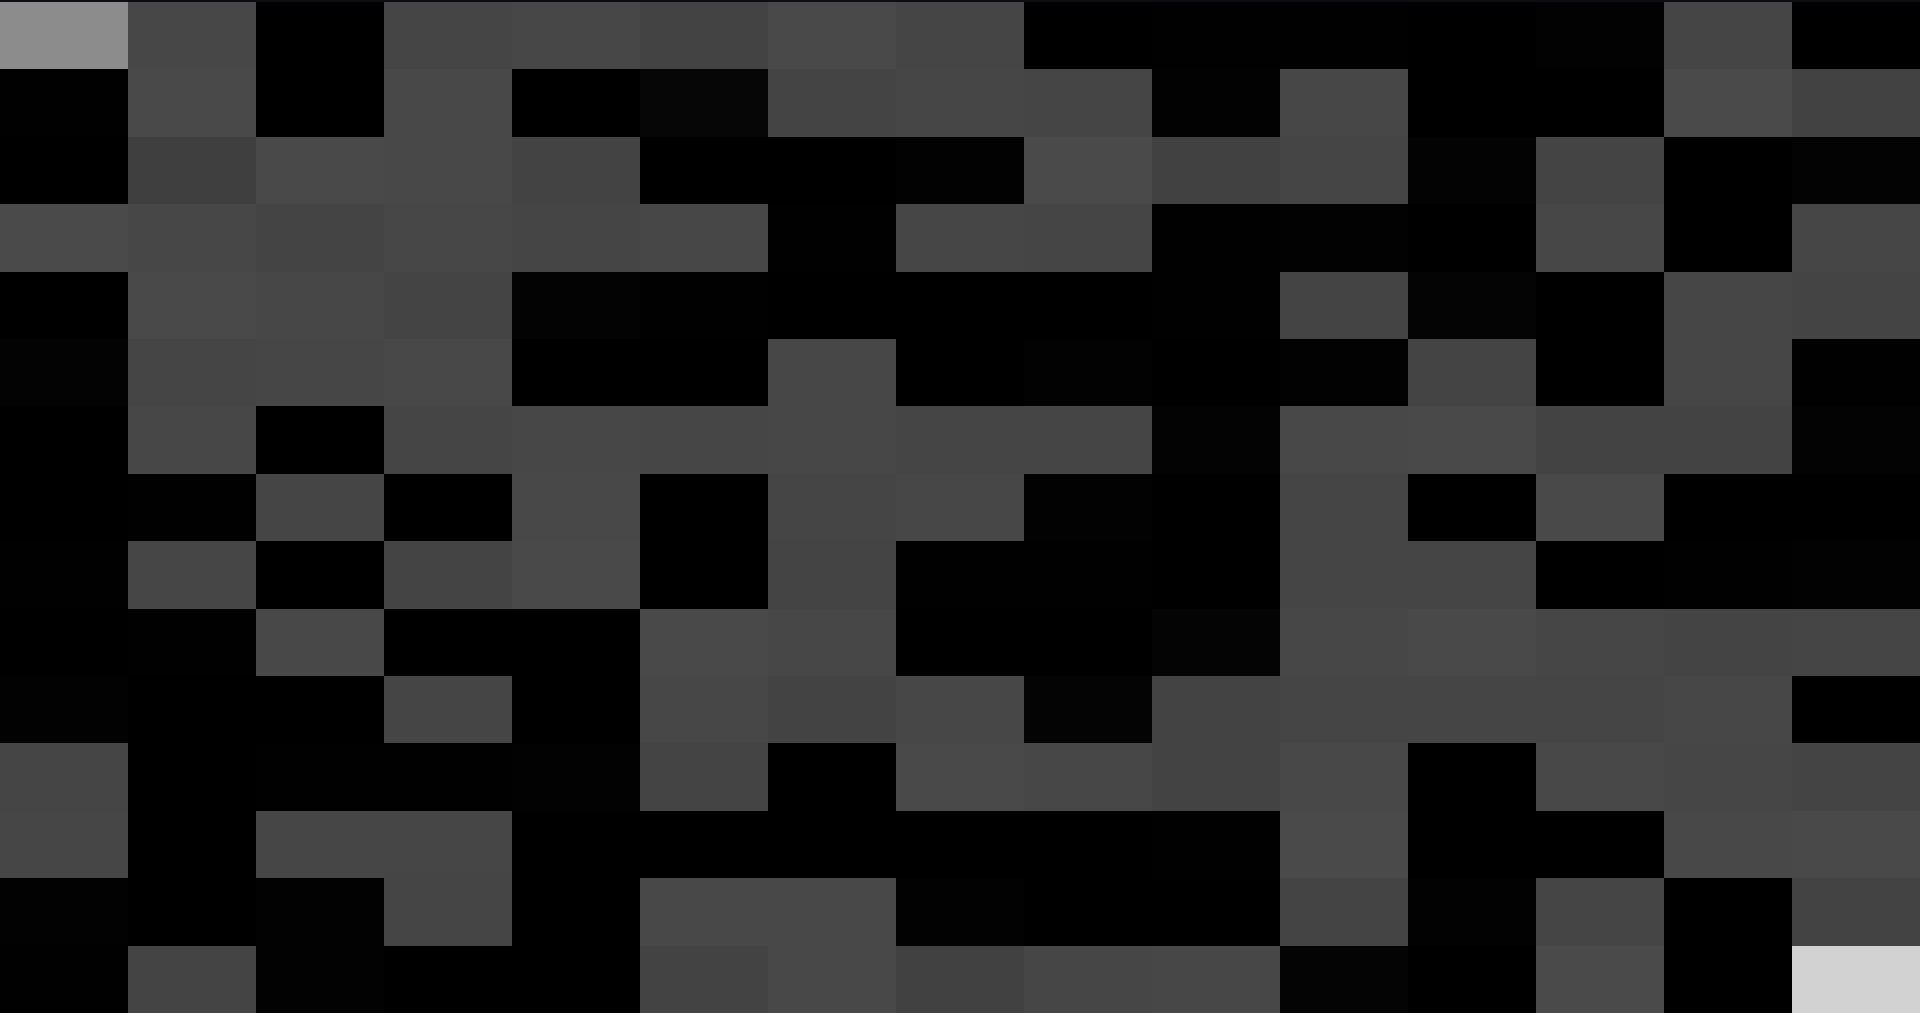

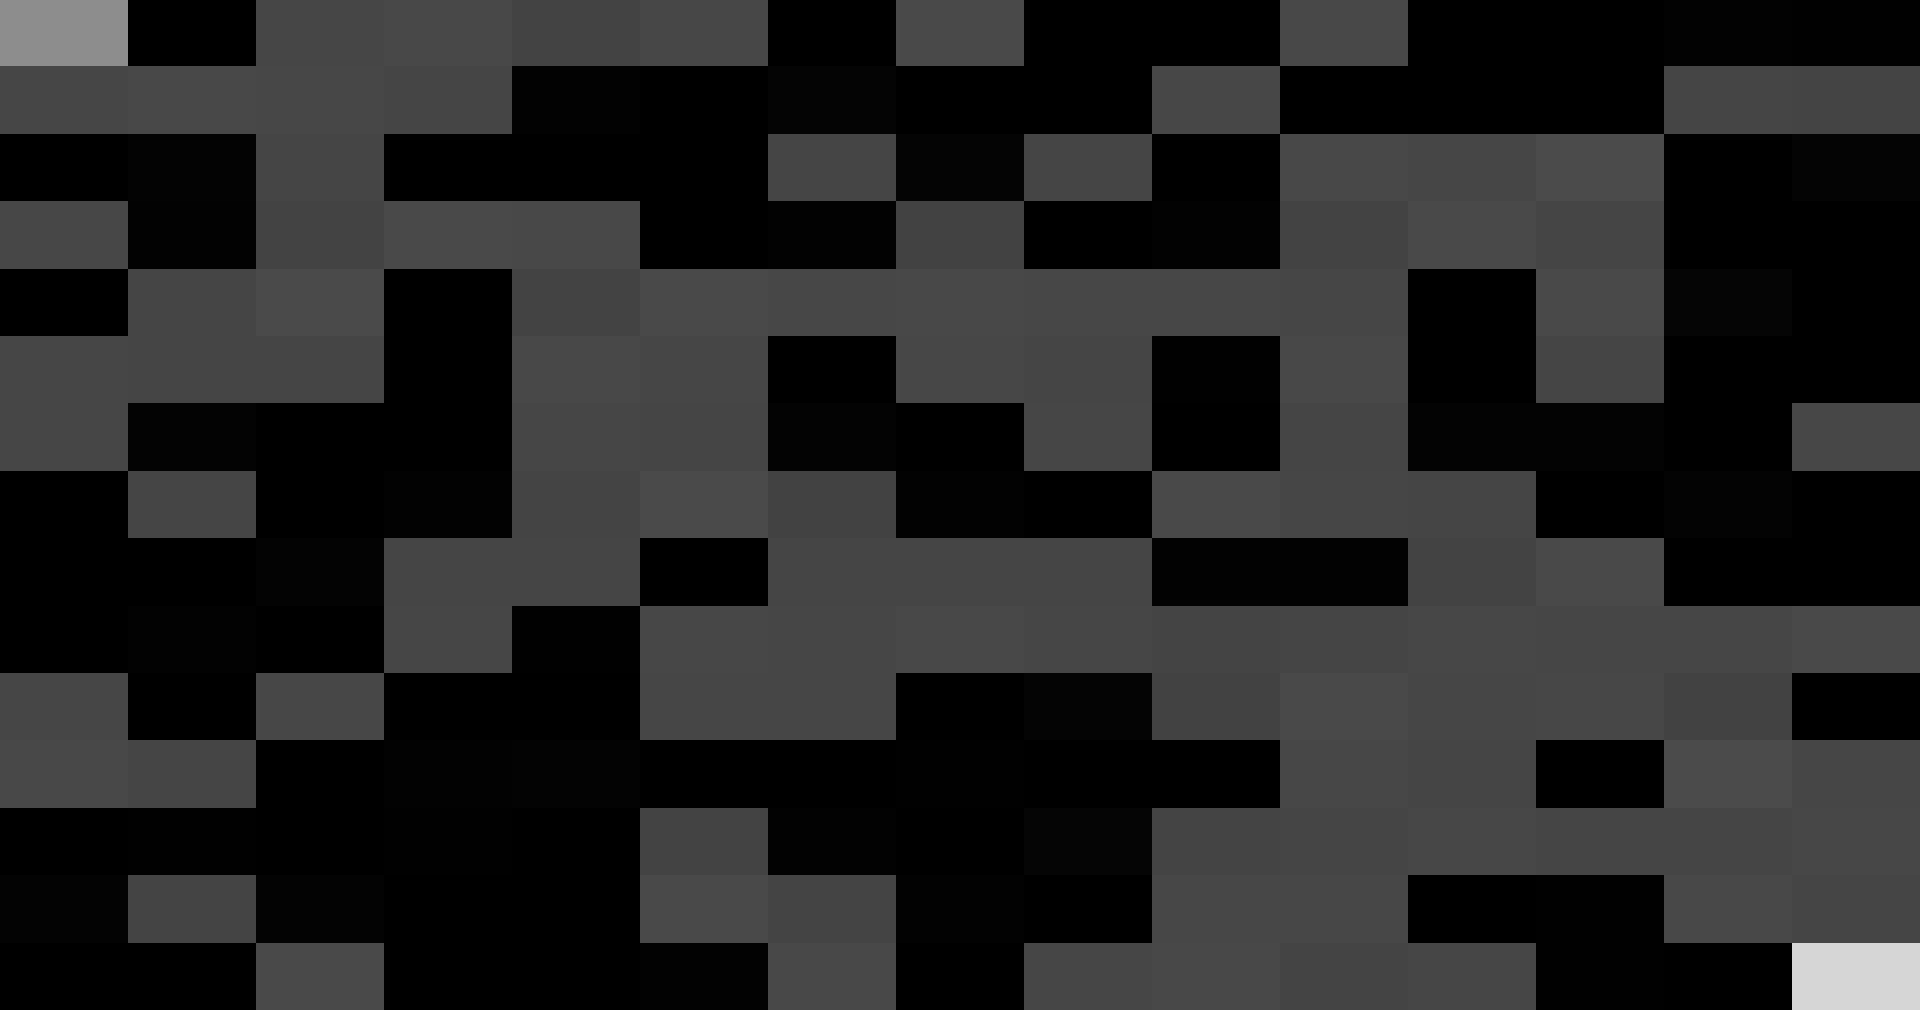

Po uwzględnieniu ilości odwiedzonych miejsc, widzimy mniej niedostępnych pól w wygenerowanym labiryncie.

### Czwarta część funkcji fitness

Czwartą częścią funkcji fitness będzie sprawdzanie czy jedynki zbierają się w klastry.
Jeśli takie przypadki się pojawią algorytm zostanie ukarany.

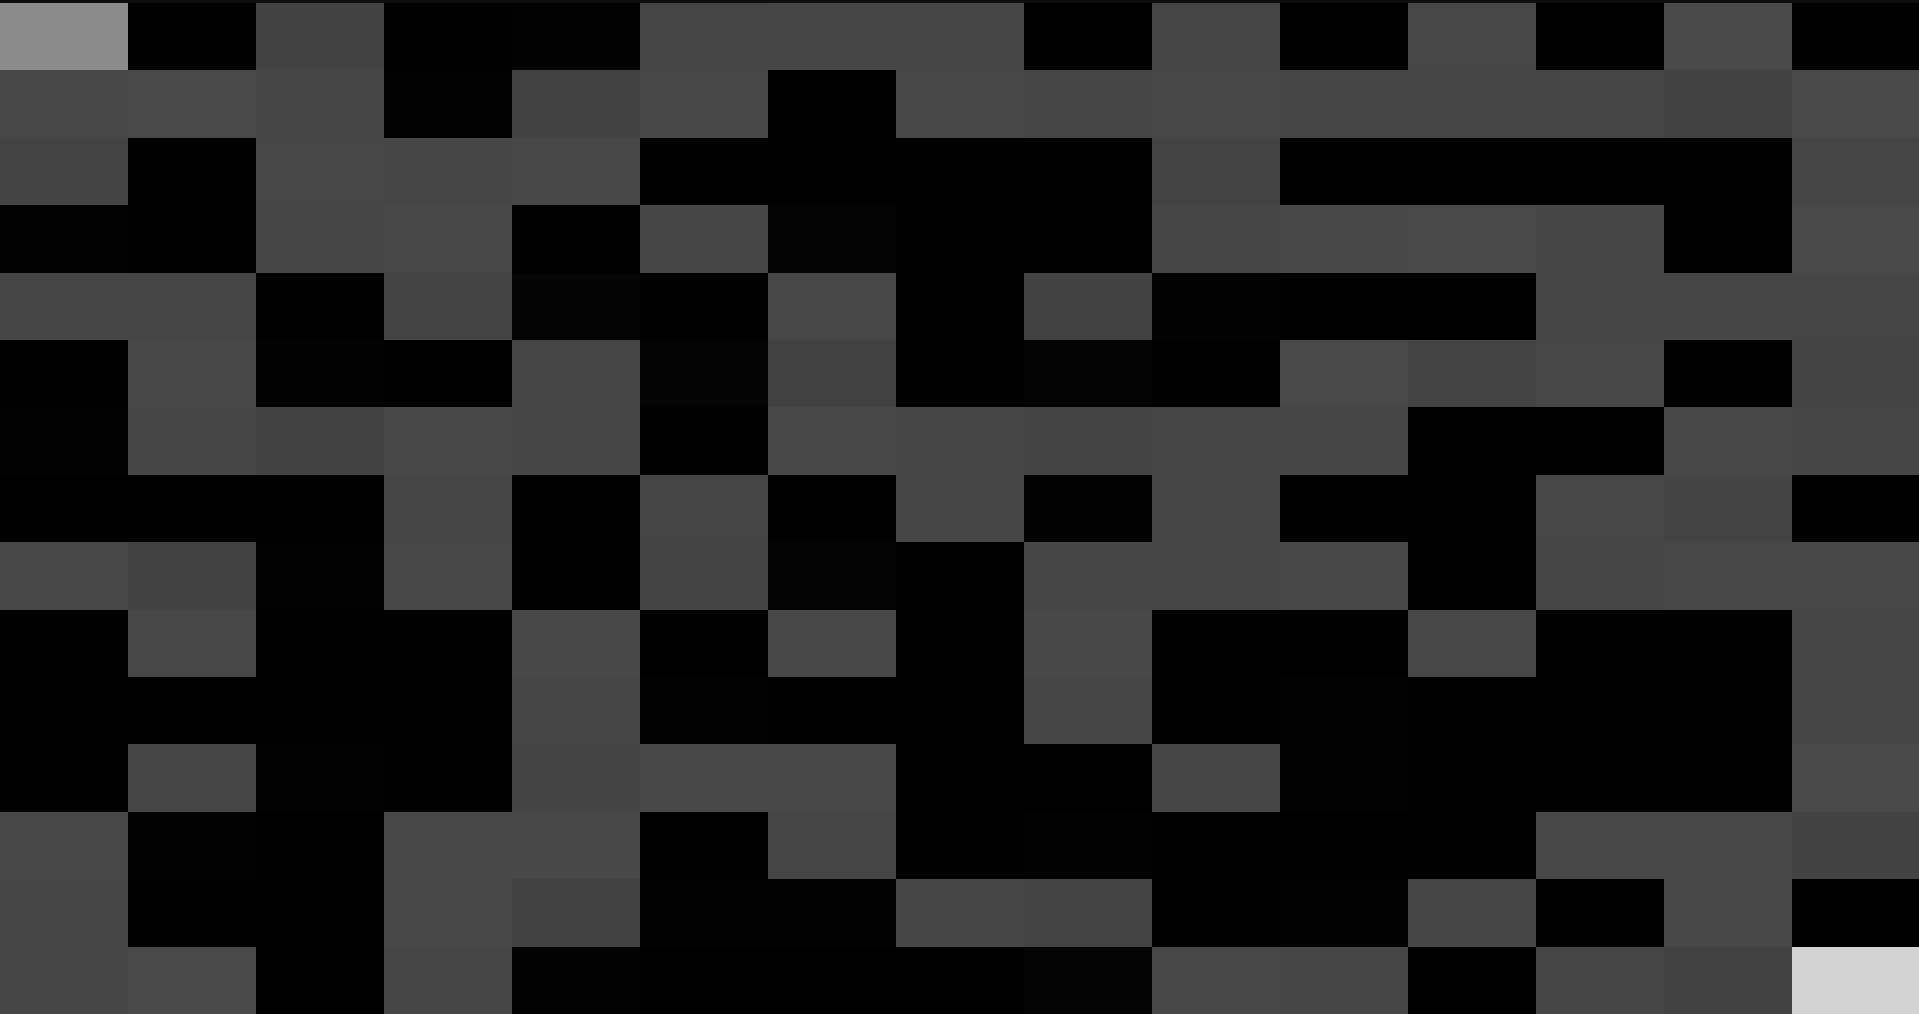

Powyżej widzimy że labirynt został utworzony jedynie z trzema klastrami jedynek,
dotatkowo rozmiar tych klastrów wynosi jedynie 2x2. 

### Piąta część funkcji fitness

Następnie możemy zażądać aby nasz algorytm skupił się na generowaniu pionowych bądź poziomych ścian.
Za wygenerowanie każdej z takich ścian przyznawane są punkty dodatkowo im ściana jest dłuższa tym więcej punktów zostanie przyznanych.

Zobaczmy jak wygląda to gdy będziemy nagradzali nasz algorytm za posiadanie równej ilości zer i jedynek, przy nagradzaniu go za posiadanie ścian poziomych.
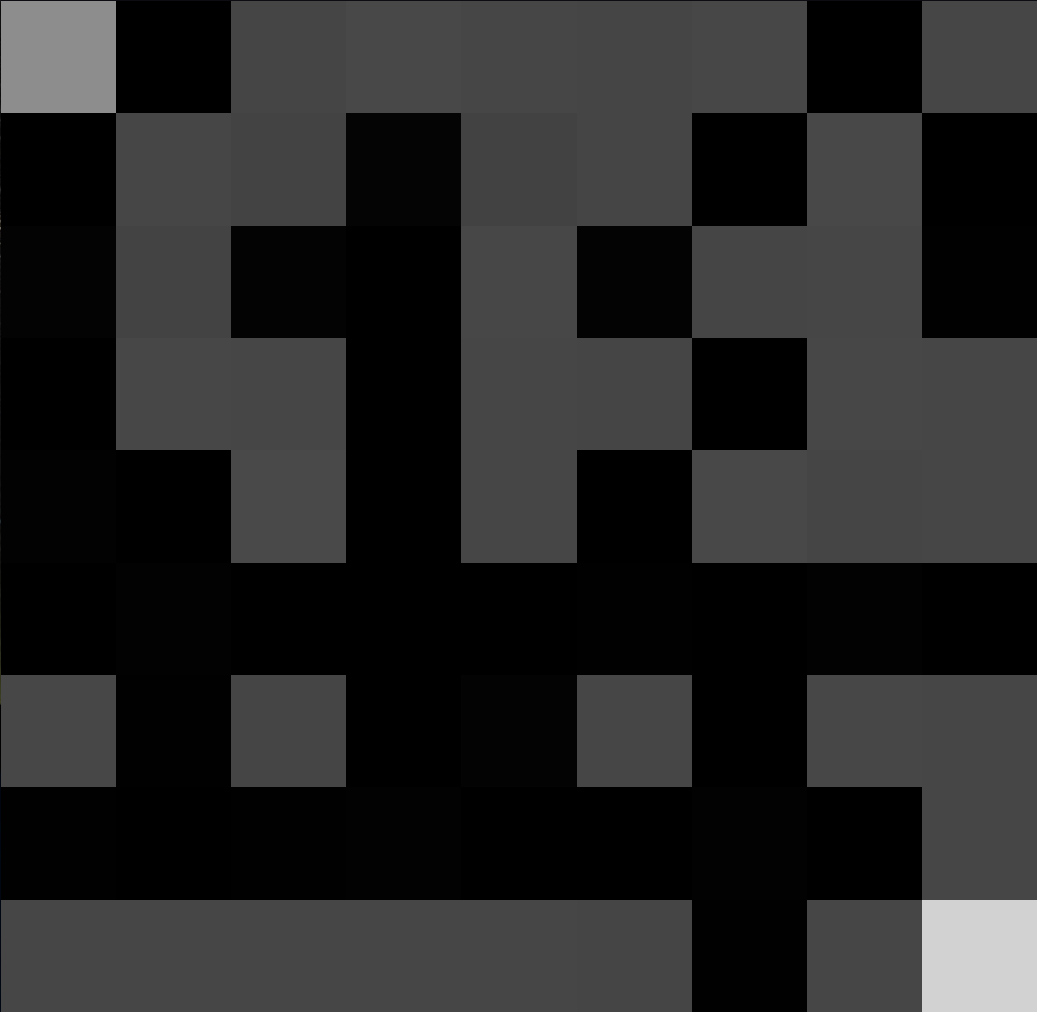

Następnie sprawdzimy czy poprawnie wygeneruje się nam labirynt zawierający pionowe ściany, dodatkowo zamiast labiryntu posiadającego rozwiązanie w tym przypadku dodatkowym czynnikiem będzie warunek aby labirynt posiadał równą część pól oznaczonych zerem i jedynką.
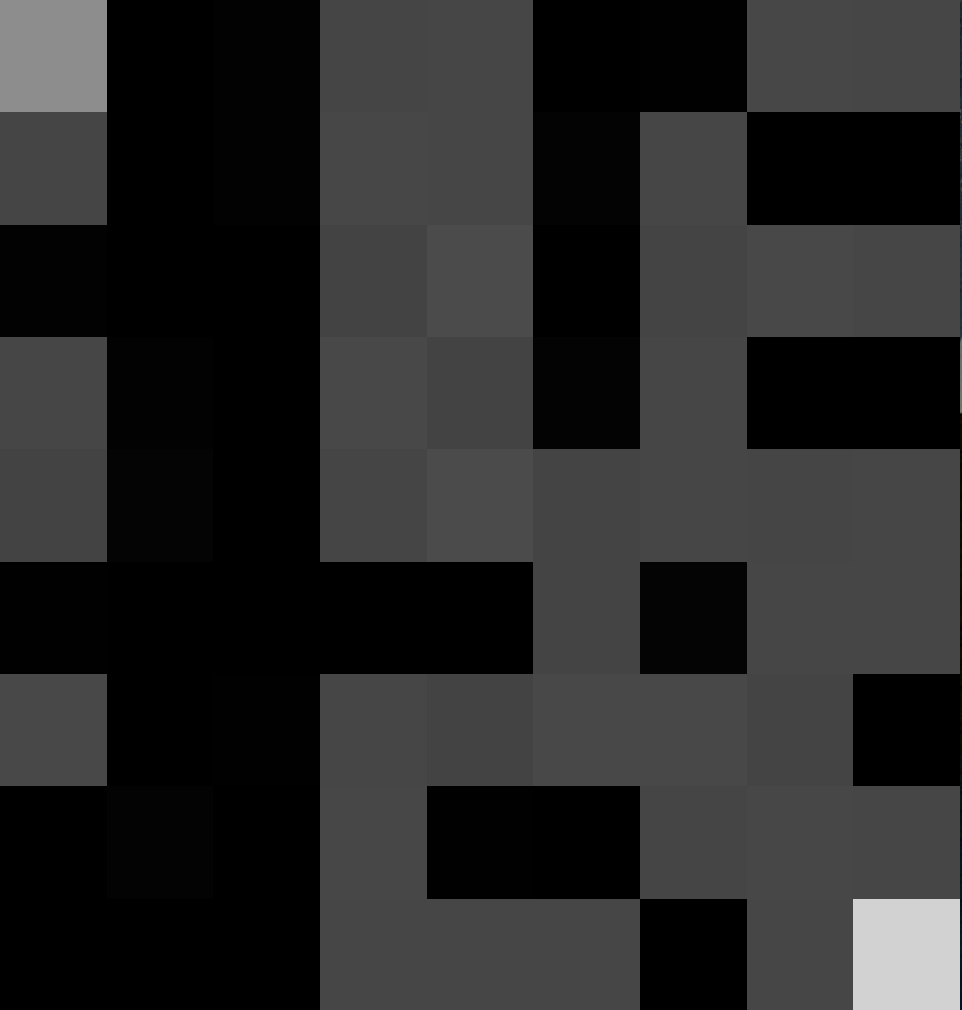
W powyższym rozwiązaniu algorytm wygenerował labirynt posiadający dwie pionowe ściany o maksymalnej wysokości.

### Sprawdzenie który z algorytmów jest szybszy

Aby ustalić który z algorytmów: Genetyczny bądź Rój, działa szybciej zmierzymy czas utworzenia labiryntu o rozmiarze 20 z użyciem funkcji fitness:
```python        
fitness = countResult + \
        solveResult[0] - clusters/size + solveResult[2]/(size/2)
```
```txt
CountResult odpowiada za równą ilośc zer i jedynek, solveResult[0] za to aby labirynt dało się rozwiązać, clusters liczy nam ilość klastrów natomiast solveResult[2] służy do upewnienia się że w labiryncie będzie istniała jak największa ilość miejsc do których będziemy w stanie dotrzeć.
```

Dla roju będziemy generować 20 cząstek w 500 iteracjach co łącznie wygeneruje nam 10000 labiryntów, w przypadku algorytmu genetycznego wygeneruje 100 solucji dla 100 generacji dzięki temu ilość wygenerowanych labiryntów będzie również wynosiła 10000.

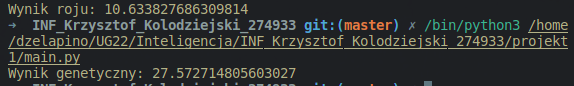

Widzimy że rój działa znacznie szybciej niż algorytm genetyczny.

### Używanie funkcji fitness do otrzymywania ciekawych wyników

Z pomocą funkcji fitness możemy wygenerować ciekawe labirynty, pierwszym z nich będzie labirynt posiadający najwięcej możliwych miejsc do odwiedzenia, spodziewam się że zostanie wygenerowany labirynt posiadający głównie jedynki.

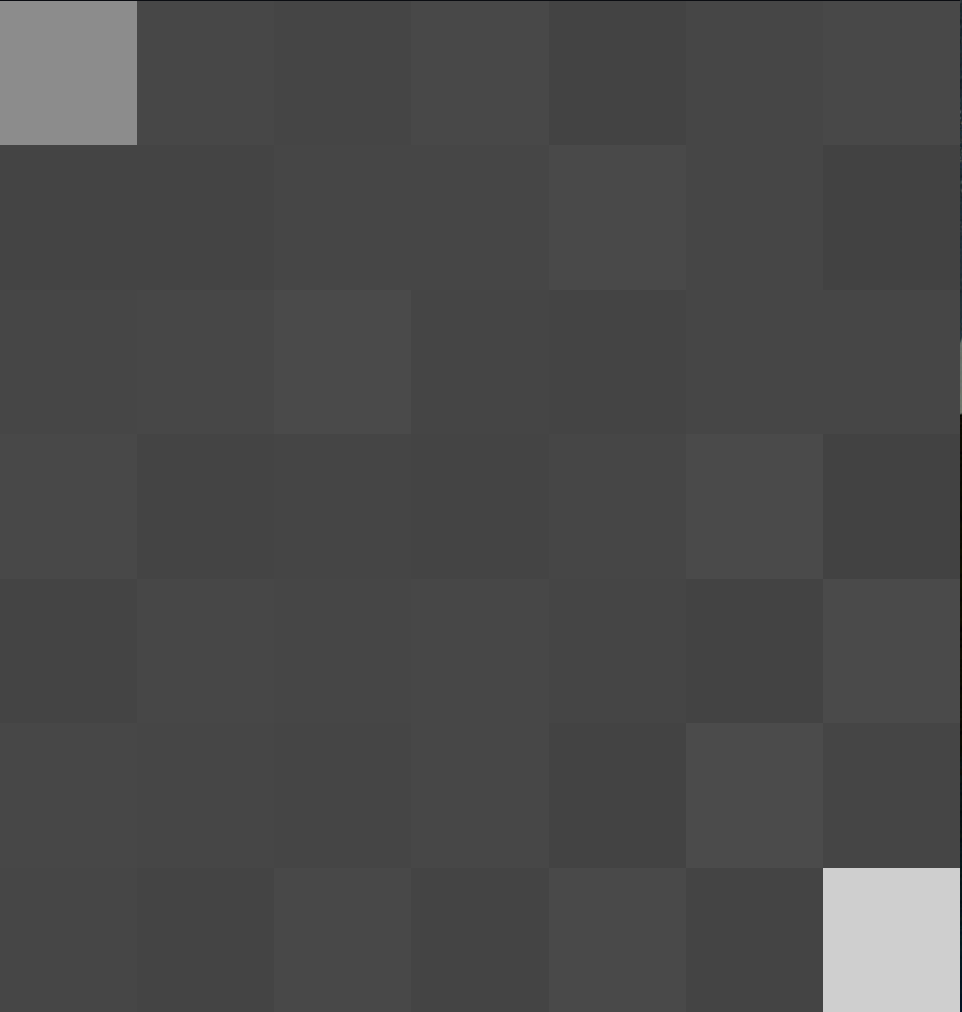

Jak widzimy na powyższym obrazku wygenerowany został labirynt zawierający jedynie pola po których możemy się poruszać.

Następnym ciekawym labiryntem jaki wygeneruje będzie labirynt zależny od ilości ruchów wymaganych do jego rozwiązania, dodatkowo będę wymagał aby ilość zer i jedynek była równa.

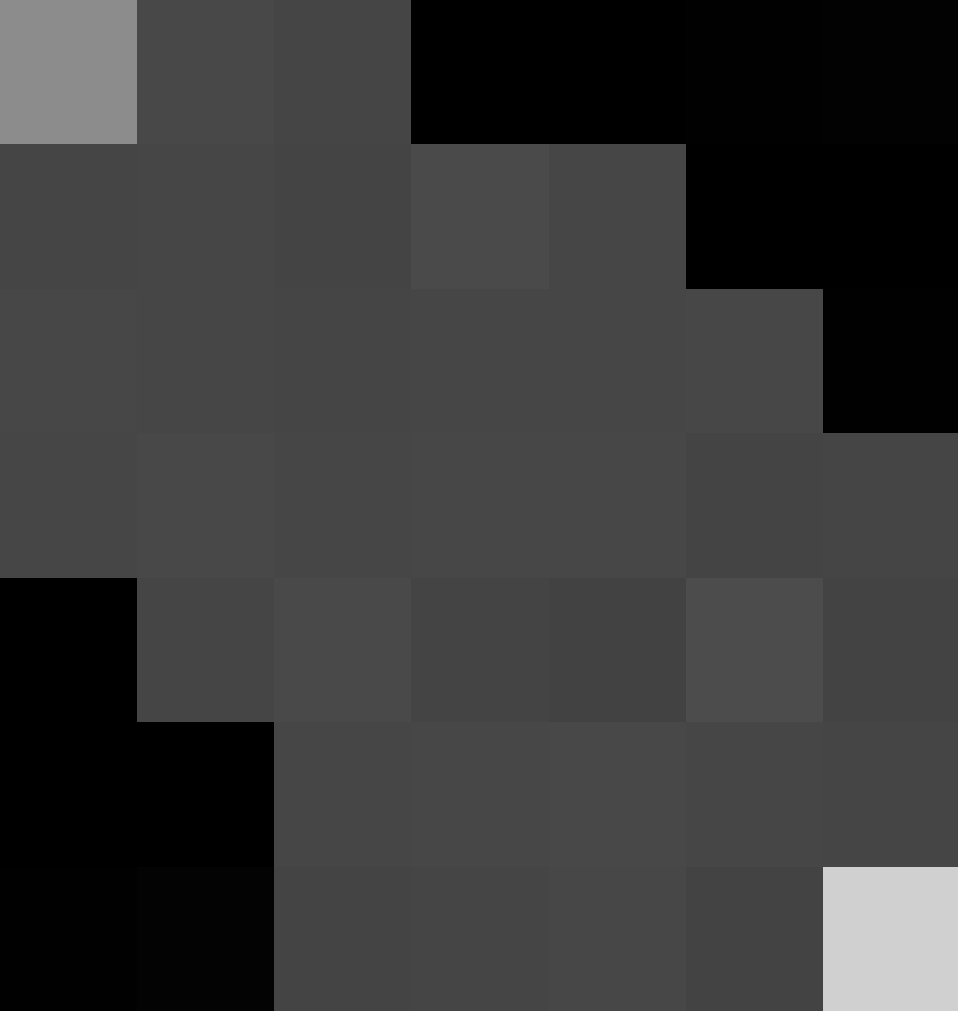

Wygenerowana została ścieżka na przekątnej, wpływ na to ma sposób rozwiązywania labiryntu poprzez szukanie ścieżki poziomo, pionowo a gdy uderzamy w ścianę cofamy się i próbujemy od nowa o pozycję niżej. Dodatkowo możemy zauważyć niespójną ilość zer i jedynek algorytm znalazł sposób na uzyskanie przewagi punktowej za pomocą ilości wykonywanych kroków.

Trzeci będzie labirynt kładący nacisk na występowanie klastru i posiadanie równej ilości zer i jedynek.

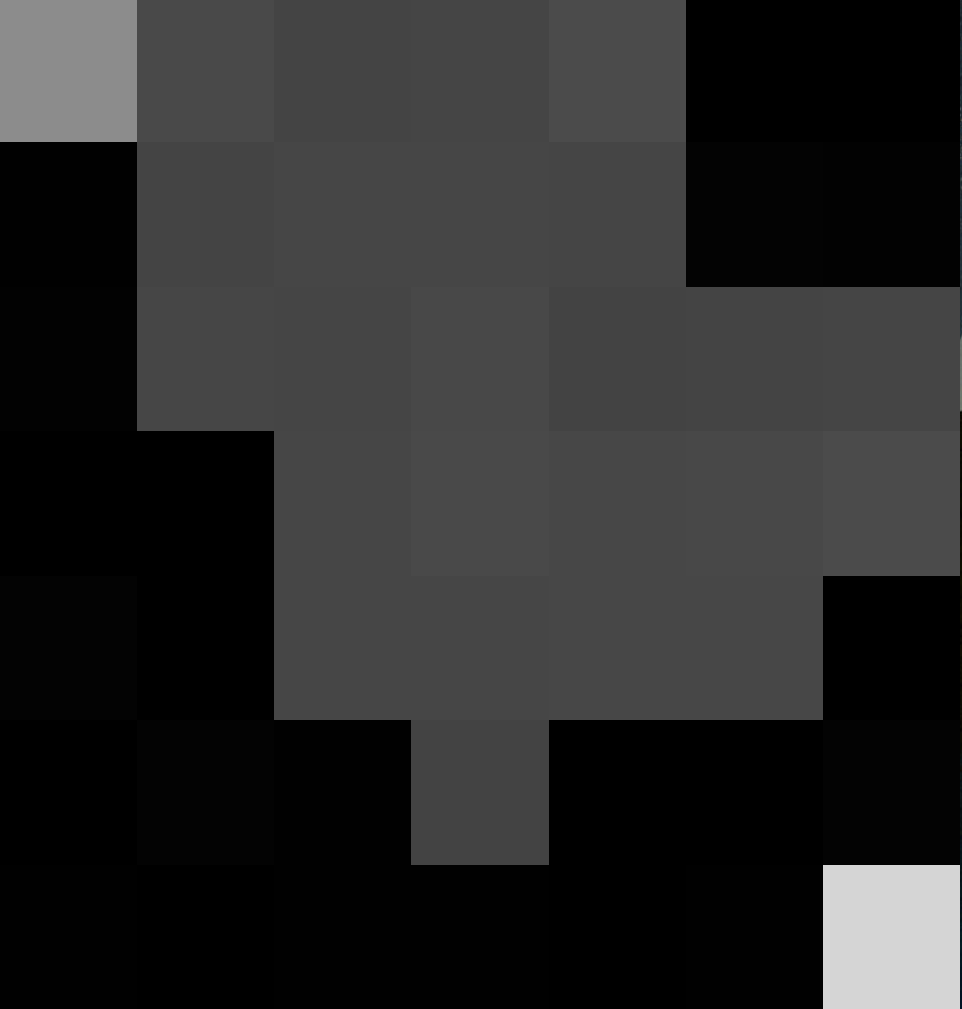

Otrzymaliśmy labirynt składający się z jednego zgrupowania pól po których możemy się poruszać.

Czwartym i ostatnim z interesujących sposobów na generowanie labiryntu, będzie labirynt promujący brak klastrów i równą ilość zer i jedynek.

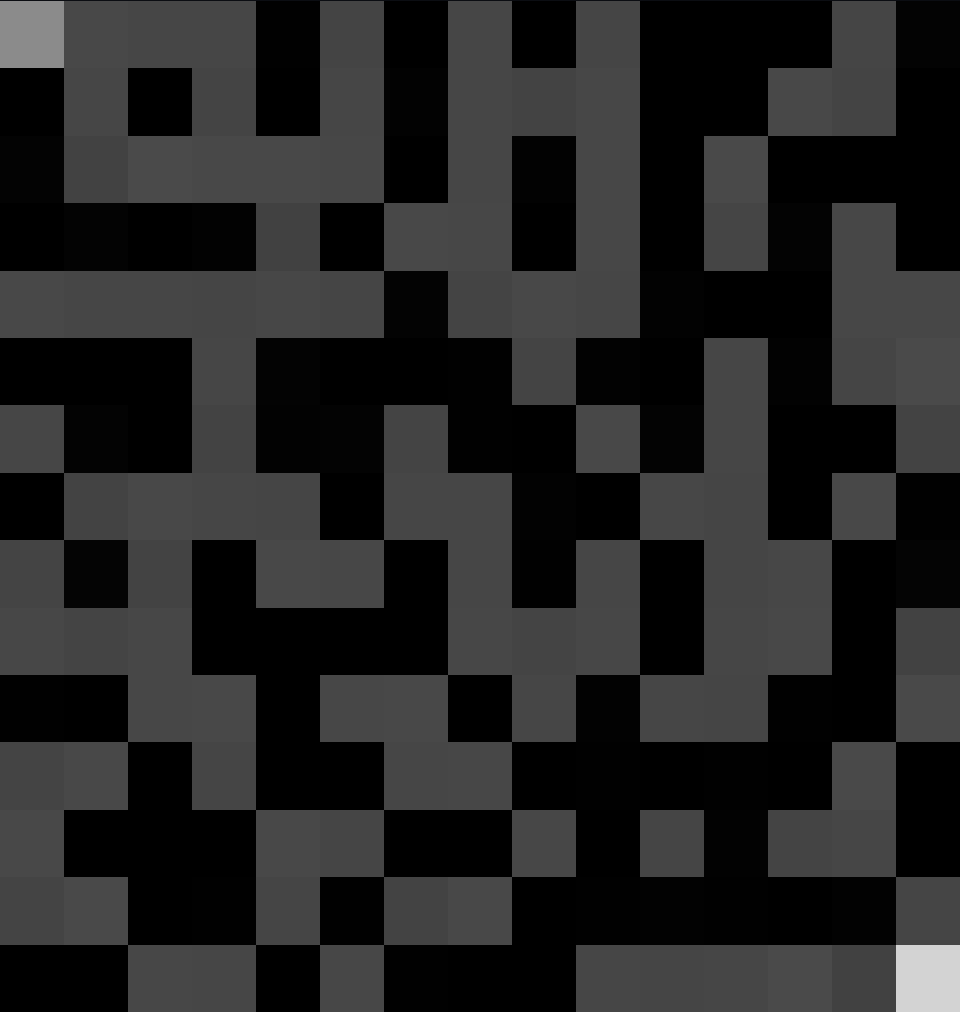

Wygenerowany został labirynt składa się głownie z samych wąskich ścieżek. Dodatkowo zauważamy częste występowanie pętli, algorytm poprzez umieszczenie zera pomiędzy zgrupowaniem jedynek jest w stanie łatwo uniknąć otrzymania negatywnej oceny przez co owa sytuacja występuje w powyższym rozwiązaniu dosyć często.